# Example

t = 0
Preferences updated!
Test agent: 
loss = 272.0
t = 1
Preferences updated!
Test agent: 
loss = 287.0
t = 2
Preferences updated!
Test agent: 
loss = 295.0
t = 3
Preferences updated!
Test agent: 
loss = 295.0
t = 4
Preferences updated!
Test agent: 
loss = 295.0
t = 5
Preferences updated!
Test agent: 
loss = 295.0
t = 6
Preferences updated!
Test agent: 
loss = 295.0
t = 7
Preferences updated!
Test agent: 
loss = 295.0
t = 8
Preferences updated!
Test agent: 
loss = 295.0
t = 9
Preferences updated!
Test agent: 
loss = 295.0


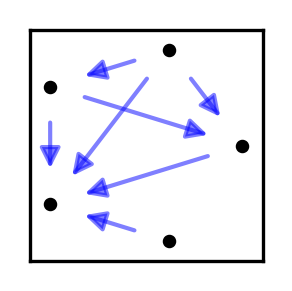

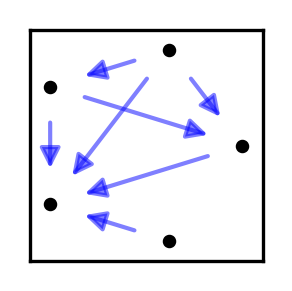

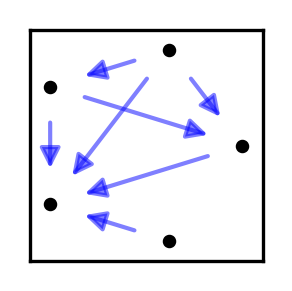

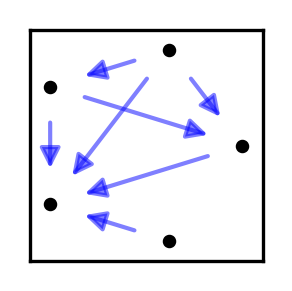

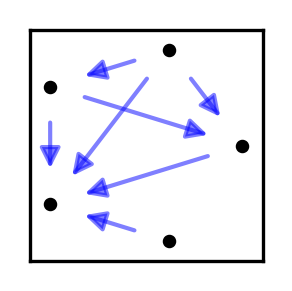

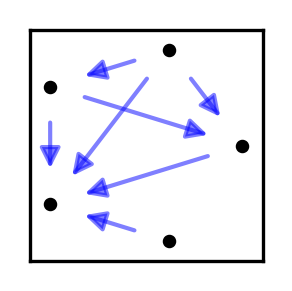

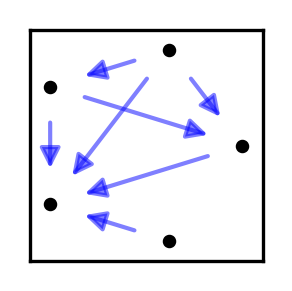

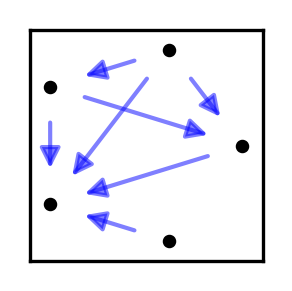

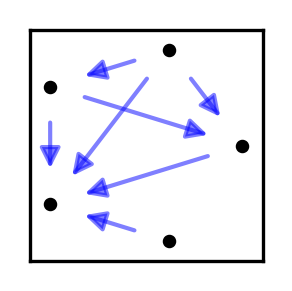

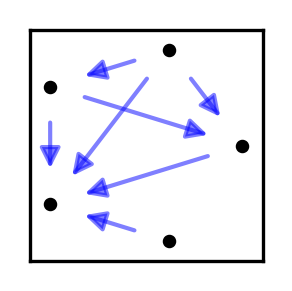

In [1]:
import numpy as np
from agents import Preference,Agent,SocialNetwork
from digraphs import generate_random_preorder,generate_random_arborescence
from random import choice,seed
from networkx import DiGraph,random_regular_graph,set_node_attributes,neighbors,draw_networkx_nodes,draw_networkx_edges,circular_layout
import matplotlib.pyplot as plt

#initial data for problem
n_seed = 29
n_experiment = 1
test_node = 0
n_agents = 20
n_alternatives = 5
n_neighbors = 10
p_preference = 0.2
n_iterations = 10
agent_dict = {}
r_values = list(range(1,n_neighbors+1))
update_rules = ['prior','posterior','meet', 'join']
seed(n_seed)
for node in range(n_agents):
    digraph = generate_random_preorder(n_alternatives,p_preference)
    agent_dict[node] = Agent(Preference(digraph),choice(r_values),choice(update_rules))
#generate a random graph defining agent-agent interactions
graph = random_regular_graph(n_neighbors,n_agents)
network_initial = SocialNetwork(graph,agent_dict)
#experiment
network = network_initial.copy()
losses = []
for t in range(n_iterations):
    print('t = '+str(t))
    network.update_preference_profile()
    print('Preferences updated!')
    print('Test agent: ')
    #plot preference relation for test agent
    plt.figure(dpi=300,figsize=[1,1])
    digraph = network.agent_dict[test_node].preference.digraph.copy()
    pos = circular_layout(digraph)
    draw_networkx_nodes(digraph,pos,node_color='black',node_size=5)
    draw_networkx_edges(digraph,pos,edge_color='blue',width=1, alpha=0.5)
    filename = 'plots/exp_'+str(n_experiment)+'_t_' +str(t) + '.png'
    plt.savefig(filename)
    #calculate loss
    matrix = network.distance_matrix()
    print('loss = '+str(loss))
    losses.append(0.5*network.distance_matrix().sum())

# Network

In [2]:
import matplotlib.pyplot as plt
from networkx import draw_networkx_nodes,draw_networkx_edges,draw_networkx_labels,circular_layout

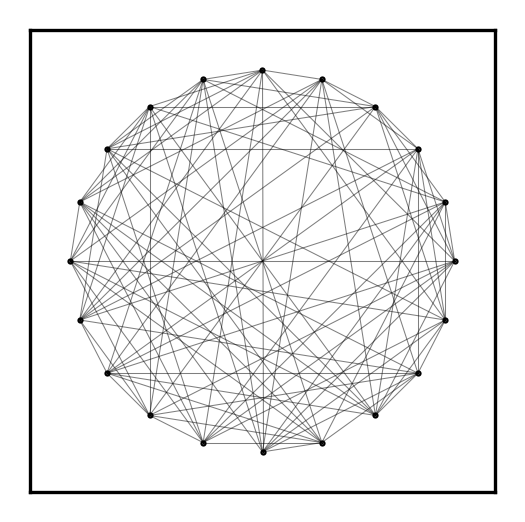

In [3]:
plt.figure(figsize=[2,2],dpi=300)
pos = circular_layout(graph)
draw_networkx_nodes(graph,pos,node_color='black',node_size=0.25)
draw_networkx_edges(graph,pos,width=0.25,alpha=0.5)
plt.show()

# Preferences

In [22]:
from networkx.algorithms.tree.branchings import Edmonds
from agents import Preference,Agent,SocialNetwork
from digraphs import generate_random_preorder
import networkx as nx
import matplotlib.pyplot as plt
from functools import reduce

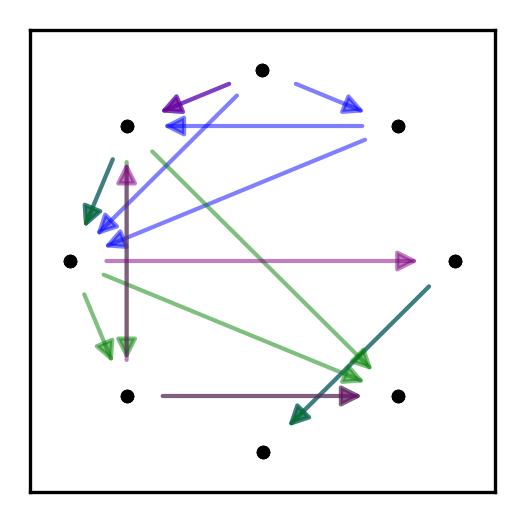

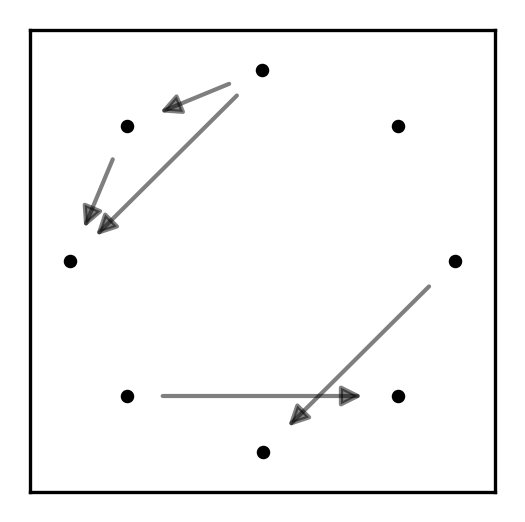

In [49]:
n_alternatives = 8
edge_prob = 0.08

pref_1 = Preference(generate_random_preorder(n_alternatives,edge_prob))
pref_2 = Preference(generate_random_preorder(n_alternatives,edge_prob))
pref_3 = Preference(generate_random_preorder(n_alternatives,edge_prob))
new_pref_1 = pref_1.meet(pref_2)
new_pref_2 = pref_1.meet(pref_3)
new_pref_3 = pref_2.meet(pref_3)
median = reduce(Preference.join,[new_pref_1,new_pref_2,new_pref_3])

fig1,ax1 = plt.subplots(figsize=[2,2],dpi=300)
pref_1.plot(edge_color='blue',ax=ax1)
pref_2.plot(edge_color='green',ax=ax1)
pref_3.plot(edge_color='purple',ax=ax1)    
plt.savefig('plots/median_1.png')
plt.show()

fig2,ax2 = plt.subplots(figsize=[2,2],dpi=300)
median.plot(edge_color='black',ax=ax2)  
plt.savefig('plots/median_2.png')
plt.show()


## Arborescences

In [50]:
from digraphs import generate_random_arborescence
from agents import Preference
import matplotlib.pyplot as plt
from networkx.algorithms.tree.branchings import Edmonds


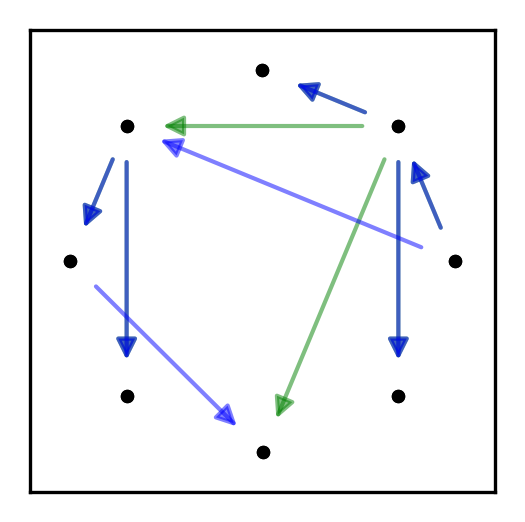

In [51]:
n_alternatives = 8
tree_1 = generate_random_arborescence(n_alternatives)
tree_2 = generate_random_arborescence(n_alternatives)
pref_1 = Preference(tree_1)
pref_2 = Preference(tree_2)
fig,ax = plt.subplots(figsize=[2,2],dpi=300)
pref_1.plot(edge_color='green',ax=ax)
pref_2.plot(edge_color='blue',ax=ax)
plt.show()

## Heuristic Greedy

In [1]:
from networkx import DiGraph,get_edge_attributes
from numpy.random import randn
from agents import Preference,Agent,SocialNetwork
from greedy import Greedy

In [2]:
n_alternatives = 8
step_max = 16
complete_digraph = DiGraph()
for i in range(n_alternatives):
    for j in range(n_alternatives):
        if i!=j:
            complete_digraph.add_edge(i,j,weight=randn())

NetworkXError: draw_networkx_edge_labels does not support multiedges.

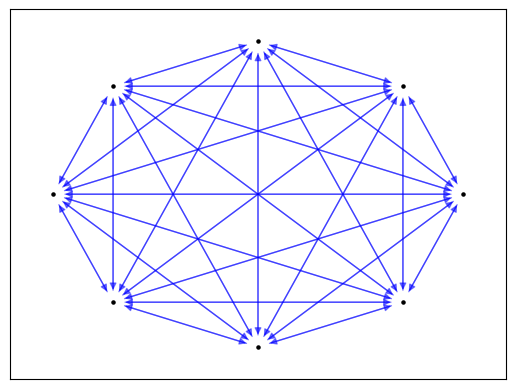

In [3]:
Preference(complete_digraph).plot()

In [3]:
greedy = Greedy(complete_digraph)

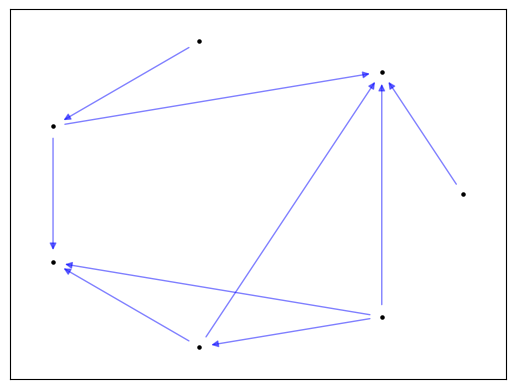

In [4]:
greedy.find_optimum(step_max).plot()

In [6]:
greedy.utility()

10.80230296449318